ColDefs(
    name = 'APSTAR_ID'; format = '57A'
    name = 'TARGET_ID'; format = '47A'
    name = 'ASPCAP_ID'; format = '59A'
    name = 'FILE'; format = '39A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'LOCATION_ID'; format = 'J'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '192A'
    name = 'SURVEY'; format = '35A'
    name = 'PROGRAMNAME'; format = '18A'
    na

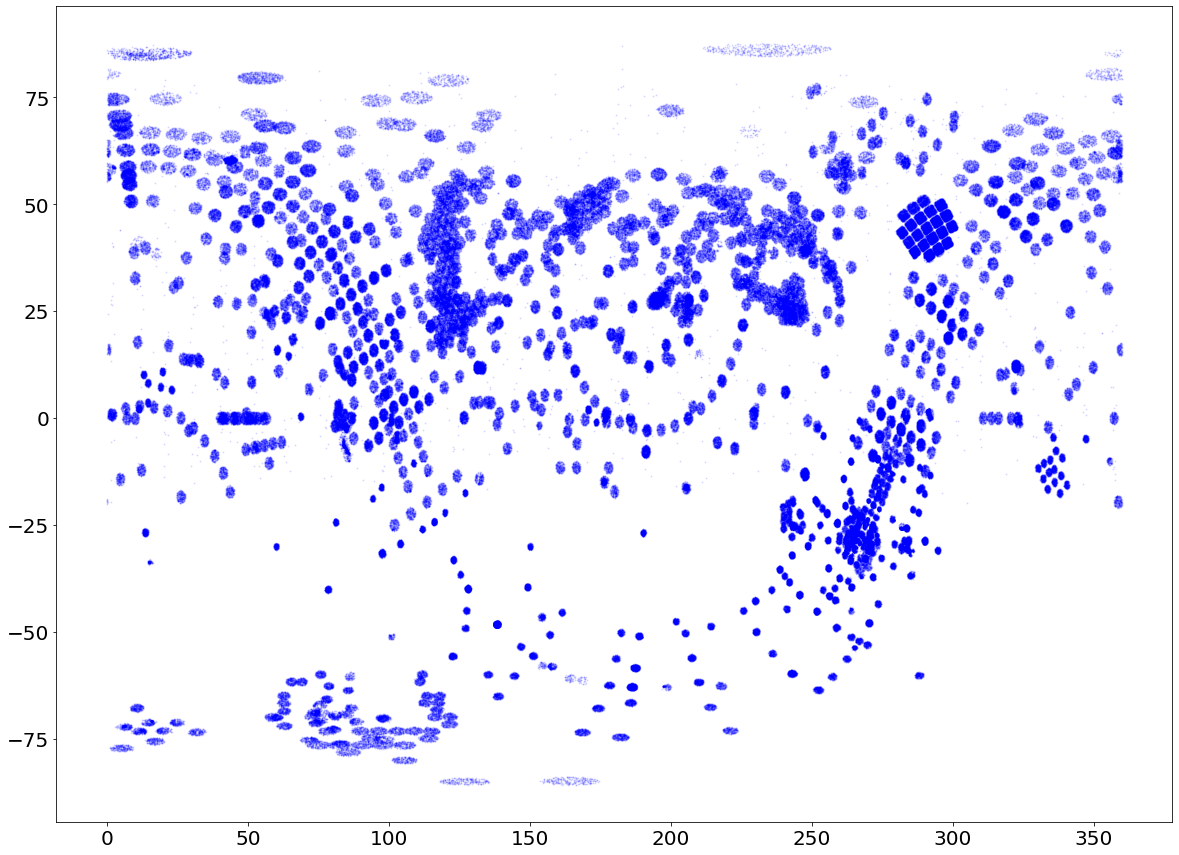

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN FITS FILES
star_hdus = fits.open('allStar-r12-l33.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['RA'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

In [2]:
def mcFit2(func, x, y, x_err, y_err, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 100 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))


def mcFit3(func, x, y, x_err, y_err,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 100 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

def mcFit4(func, x, y, x_err, y_err, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 100 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])

    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


# READ IN FITS FILES
star_hdus = fits.open('allStar-r12-l33.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

ColDefs(
    name = 'APSTAR_ID'; format = '57A'
    name = 'TARGET_ID'; format = '47A'
    name = 'ASPCAP_ID'; format = '59A'
    name = 'FILE'; format = '39A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'LOCATION_ID'; format = 'J'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '192A'
    name = 'SURVEY'; format = '35A'
    name = 'PROGRAMNAME'; format = '18A'
    na

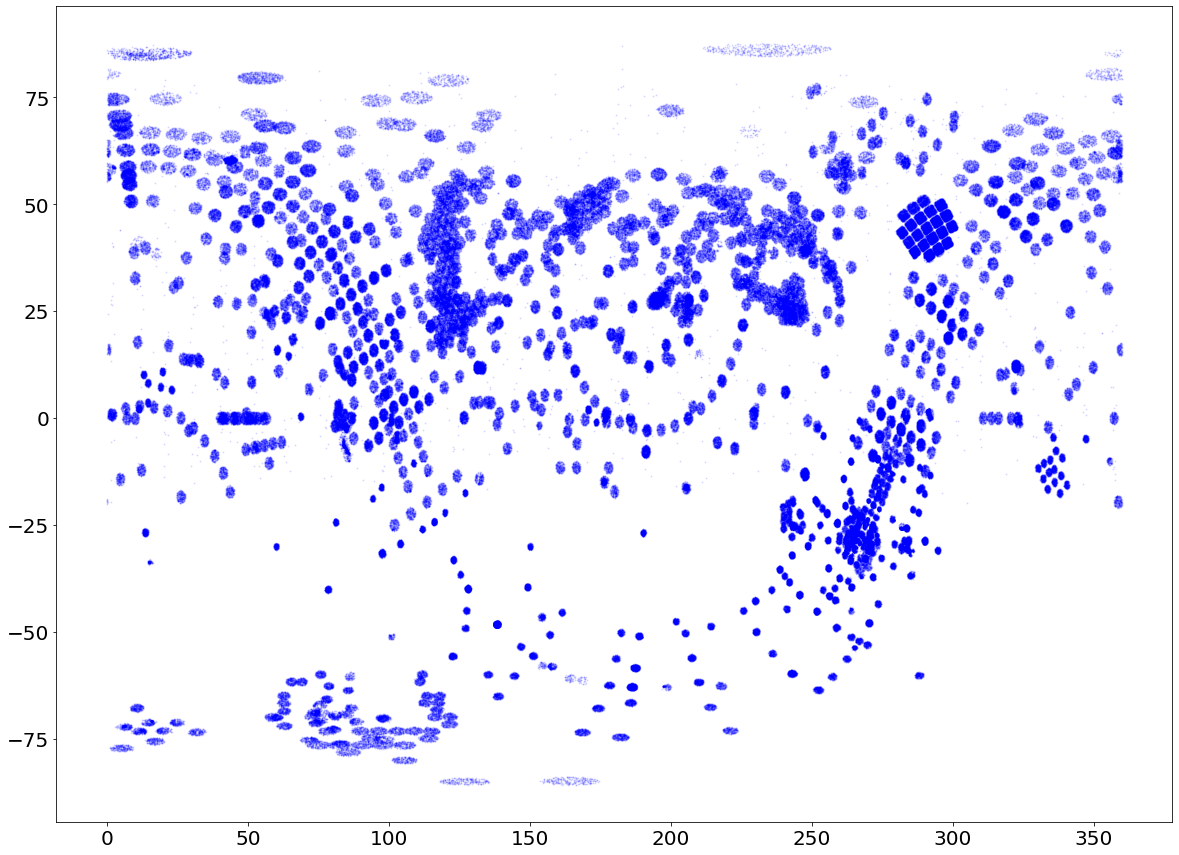

In [3]:
# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['RA'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

LINEAR:  0.005766074796261575 0.026268658868152828
POLY2:  0.04021969218574507 0.028001136743551577 0.024911775930281155
Poly3:  0.09984860700962818 0.18806317619093832 0.04173486894628238 0.016430107567524943


<ipython-input-1-7145d2d7e1e6>:23: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d
/Users/hopesage/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


logfit:  0.5 0.5 0.5 0.5
lorentzian:  1.1428496002640613 0.015087981886482893 144.22016015907727
sigmoid:  0.23235607553865095 21.94656273932813 0.053330514472698376 0.019735632909775633


<ipython-input-1-7145d2d7e1e6>:23: RuntimeWarning: divide by zero encountered in log
  return a*np.log(b*x + c) + d
<ipython-input-1-7145d2d7e1e6>:23: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d
<ipython-input-1-7145d2d7e1e6>:23: RuntimeWarning: divide by zero encountered in log
  return a*np.log(b*x + c) + d
<ipython-input-1-7145d2d7e1e6>:23: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d


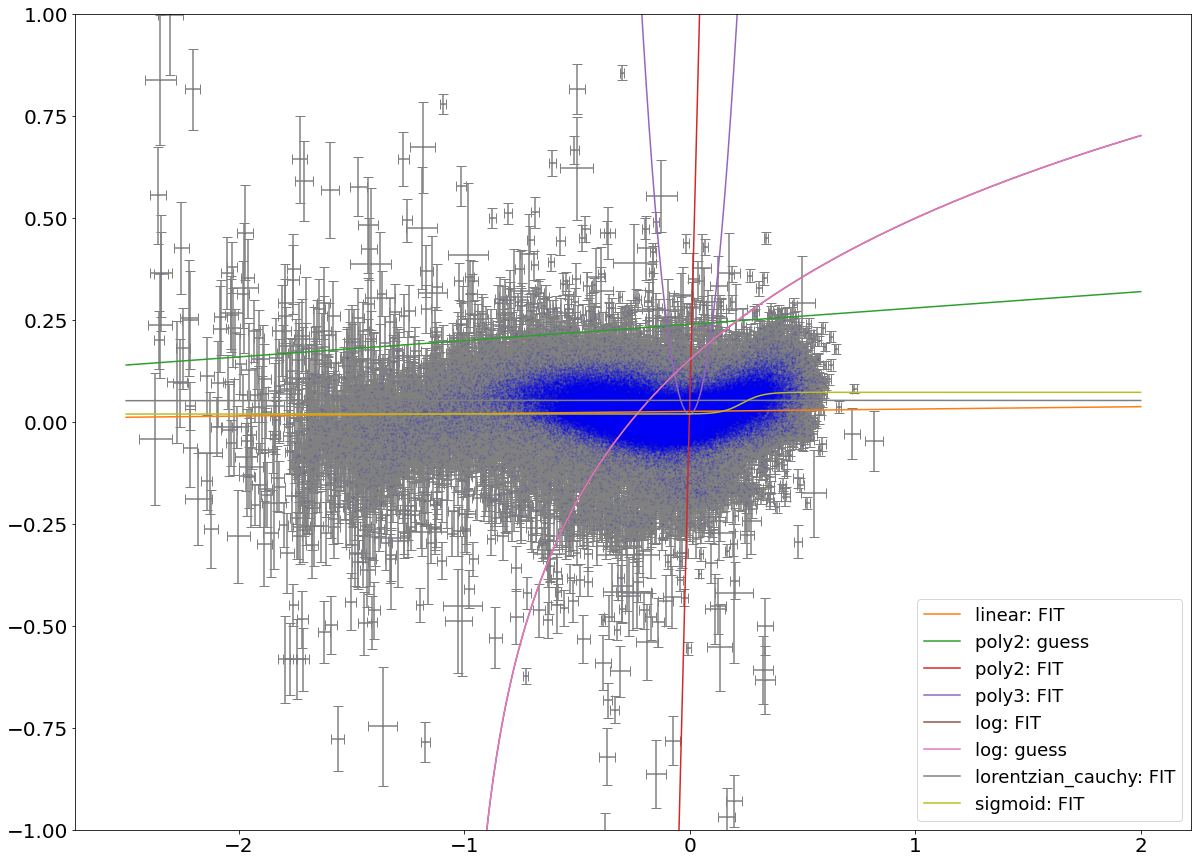

In [5]:
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] < 10) & (star['GLAT'] > -10) & (star['Fe_H']>-9000) & (star['NI_FE']> -9000)
cut1 = np.where(ct1)[0]


## LINEAR FIT
slope, intercept = mcFit2(linear, star['Fe_H'][cut1], star['NI_FE'][cut1], star['Fe_H_ERR'][cut1], star['NI_FE_ERR'][cut1])
print("LINEAR: ",slope, intercept)

## COSFITS
#prcosA, prcosB, prcosC, prcosD = mcFit4(cosfit, star['Fe_H'][cut1], star['NI_FE'][cut1], star['Fe_H_ERR'][cut1], star['NI_FE_ERR'][cut1], p0=[1, 2, 0, 0])
#print("COSFIT: ",prcosA, prcosB, prcosC, prcosD)

## poly2
prA, prB, prC = mcFit3(poly2, star['Fe_H'][cut1], star['NI_FE'][cut1], star['Fe_H_ERR'][cut1], star['NI_FE_ERR'][cut1],p0= [0,0.04,0.24])
print("POLY2: ",prA, prB, prC)

##poly3
prA, prB, prC, prD = mcFit4(poly3, star['Fe_H'][cut1], star['NI_FE'][cut1], star['Fe_H_ERR'][cut1], star['NI_FE_ERR'][cut1])
print("Poly3: ",prA, prB, prC, prD)

## logfit
prlogA, prlogB, prlogC, prlogD = mcFit4(logfit, star['Fe_H'][cut1], star['NI_FE'][cut1], star['Fe_H_ERR'][cut1], star['NI_FE_ERR'][cut1], p0= [0.5, 0.5, 0.5, 0.5])
print("logfit: ",prlogA, prlogB, prlogC, prlogD)

#lorentzian= 
prA, prB, prC = mcFit3(lorentzian_cauchy, star['Fe_H'][cut1], star['NI_FE'][cut1], star['Fe_H_ERR'][cut1], star['NI_FE_ERR'][cut1])
print("lorentzian: ",prA, prB, prC)

#sigmoid
prA, prB, prC, prD = mcFit4(sigmoid, star['Fe_H'][cut1], star['NI_FE'][cut1], star['Fe_H_ERR'][cut1], star['NI_FE_ERR'][cut1],p0=[1,1,1,1])
print("sigmoid: ",prA, prB, prC, prD)

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(20,15))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['Fe_H'][cut1],star['NI_FE'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['Fe_H'][cut1]),star['NI_FE'][cut1], xerr=(star['Fe_H_ERR'][cut1]), yerr=(star['NI_FE_ERR'][cut1]), ecolor='grey',fmt='none', capsize=5, zorder=0)

# PLOT FITS
x_plot = np.linspace(-2.5,2,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#cosfit
#ax1.plot(x_plot,cosfit(x_plot, prcosA, prcosB, prcosC, prcosD), label='cosfit: FIT')
#poly2
ax1.plot(x_plot,poly2(x_plot,0,0.04,0.24), label='poly2: guess')
ax1.plot(x_plot,poly2(x_plot, prA, prB, prC), label='poly2: FIT')
#poly3
ax1.plot(x_plot,poly3(x_plot, prA, prB, prC, prD), label='poly3: FIT')
#logfit
ax1.plot(x_plot,logfit(x_plot, prlogA, prlogB, prlogC, prlogD), label='log: FIT')
ax1.plot(x_plot,logfit(x_plot, 0.5, 0.5, 0.5, 0.5), label='log: guess')
#lorenztian
ax1.plot(x_plot,lorentzian_cauchy(x_plot, prA, prB, prC), label='lorentzian_cauchy: FIT')
#sigmoid
ax1.plot(x_plot,sigmoid(x_plot, prA, prB, prC, prD), label='sigmoid: FIT')
ax1.set_ylim(-1,1)

plt.legend(loc='best', fontsize=18)
plt.show()